# 16기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [124]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [125]:
df.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,4998,4998,4998,4998,4998
unique,1797,2,7,3,5
top,P00265242,M,26-35,B,1
freq,21,3765,1996,2102,1758


In [126]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [127]:
df['Product_Category_2'].mean()

9.773737373737374

In [128]:
# Product_Category_2의 결측값은 임의로 평균값과 유사한 9로로 대체
df['Product_Category_2'].fillna(9, inplace = True)


In [129]:
#Product_Category_3은 결측치가 너무 많아 (70%) 제거
df.drop('Product_Category_3',axis =1, inplace = True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,9.0,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,9.0,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,9.0,1413


### Age

In [130]:
df['Age'].value_counts()

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

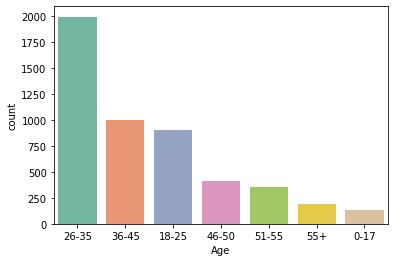

In [131]:
sns.countplot(x='Age', data=df, palette='Set2', order=df['Age'].value_counts().index)


26-35세 비율이 가장 높았음

### Gender

In [132]:
df['Gender'].value_counts().index

Index(['M', 'F'], dtype='object')

([<matplotlib.patches.Wedge at 0x2a25904e308>,
 [Text(-0.785842545718456, 0.7697087068097492, 'M'),
  Text(0.7858425457184559, -0.7697087068097493, 'F')])

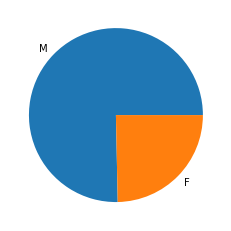

In [133]:
plt.pie(df["Gender"].value_counts(), labels = df['Gender'].value_counts().index)

### Occupation

In [134]:
df['Occupation'].value_counts()

4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

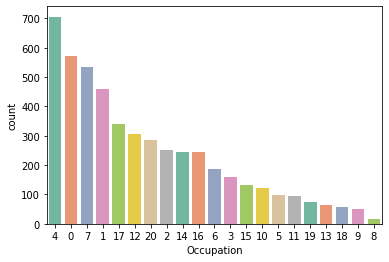

In [135]:
sns.countplot(x='Occupation', data=df, palette='Set2', order=df['Occupation'].value_counts().index)


### City_Category

In [136]:
df['City_Category'].value_counts()

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='count'>

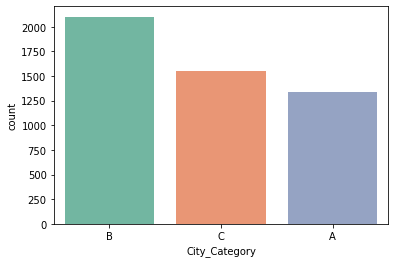

In [137]:
sns.countplot(x='City_Category', data=df, palette='Set2', order=df['City_Category'].value_counts().index)


### Stay_In_Current_City_Years

In [138]:
df['Stay_In_Current_City_Years'].value_counts()

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

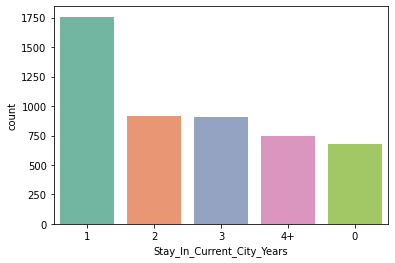

In [139]:
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2', order=df['Stay_In_Current_City_Years'].value_counts().index)


### Marital_Status

In [140]:
df['Marital_Status'].value_counts()

0    2892
1    2106
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

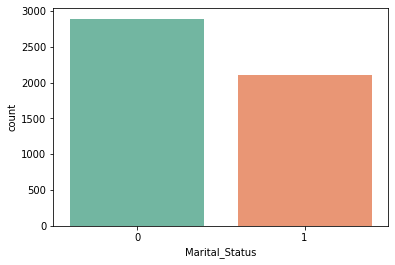

In [141]:
sns.countplot(x='Marital_Status', data=df, palette='Set2', order=df['Marital_Status'].value_counts().index)


### Product_Category_1

In [142]:
df['Product_Category_1'].value_counts()

5     1407
1     1285
8      995
2      227
11     206
3      193
6      193
4      107
16      78
15      57
13      43
10      41
7       40
20      31
12      31
19      20
14      19
18      18
17       6
9        1
Name: Product_Category_1, dtype: int64

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

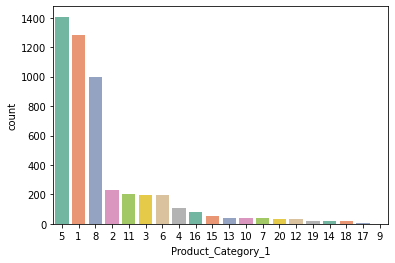

In [143]:
sns.countplot(x='Product_Category_1', data=df, palette='Set2', order=df['Product_Category_1'].value_counts().index)


5, 1, 8 번 프로덕트가 월등히 많이 팔렸음을 확인 할 수 있다. 

### Product_Category_2

In [144]:
df['Product_Category_2'].value_counts()

9.0     1598
8.0      588
14.0     496
2.0      448
16.0     392
15.0     345
5.0      258
4.0      246
6.0      148
17.0     132
11.0     110
13.0     102
12.0      40
3.0       35
10.0      30
18.0      23
7.0        7
Name: Product_Category_2, dtype: int64

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

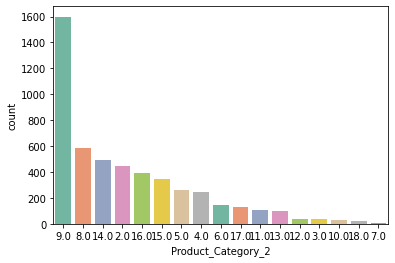

In [145]:
sns.countplot(x='Product_Category_2', data=df, palette='Set2', order=df['Product_Category_2'].value_counts().index)


결측치를 대체한 9.77을 제외하면 8번 제품이 가장 많이 팔렸다


### Product_ID

In [146]:
len(df['Product_ID'].unique())

1797

In [147]:
df.drop('Product_ID', axis =1 , inplace= True)
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,F,0-17,10,A,1,0,7,9.0,4483
2,1005302,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,1000837,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,M,55+,1,C,1,1,8,9.0,2045
4995,1001908,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,M,55+,0,C,2,1,12,9.0,1413


Product_ID의 종류에는 1797개가 있으나 이는 전체 데이터셋의 개수인 4998에 비해 그 종류가 많다. 추가적인 조사 및 데이터 처리로 Product_ID에서 유사 품종들을 충분히 상위범주로 분류 할 수 있겠으나 이번에는 목적이 KNN이므로 그냥 삭제하도록 한다.

In [148]:
df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,F,0-17,10,A,1,0,7,9.0,4483
2,1005302,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,1000837,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,M,55+,1,C,1,1,8,9.0,2045
4995,1001908,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,M,55+,0,C,2,1,12,9.0,1413


In [149]:
# 범주형 범수인 Occupation, Marital_Status, Product_Category_1, Product_Category_2 에 대해 object 타입으로 변환
df['Occupation'] = df['Occupation'].astype("object")
df['Marital_Status'] = df['Marital_Status'].astype("object")
df['Product_Category_1'] = df['Product_Category_1'].astype("object")
df['Product_Category_2'] = df['Product_Category_2'].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     4998 non-null   int64 
 1   Gender                      4998 non-null   object
 2   Age                         4998 non-null   object
 3   Occupation                  4998 non-null   object
 4   City_Category               4998 non-null   object
 5   Stay_In_Current_City_Years  4998 non-null   object
 6   Marital_Status              4998 non-null   object
 7   Product_Category_1          4998 non-null   object
 8   Product_Category_2          4998 non-null   object
 9   Purchase                    4998 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 558.6+ KB


In [150]:
# User_ID는 분석에 필요하지 않으므로 삭제하며 남은 범주형 칼럼에 대해 One-hot encoding을 진행한다.
# X,y 값을 나눈다.
df.drop("User_ID",axis =1, inplace = True)

y = df['Gender']
X = df.drop("Gender",axis =1 )
X = pd.get_dummies(X)
X

,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4483,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7696,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16429,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5780,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11701,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4994,2045,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4995,4505,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1413,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train set / Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2021)

# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (3498, 76)
Test set dimension is (1500, 76)


In [152]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.741


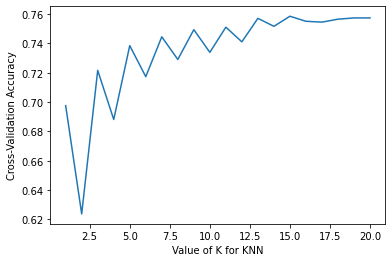

In [153]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))           
k_score = []                    

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = "accuracy")    
    k_score.append(scores.mean())                    
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

확실히 k값이 짝수값을 때보다 홀수값일 때가 정확도가 높았으며 k가 높을 수록 정확도가 높아짐을 확인할 수 있다.
하지만 k값이 클수록 모델의 복잡도가 높아지므로, 정확도가 어느정도 수렴하는 k=5정도가 적합한것 같다.